In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [7]:
df.columns = df.columns.str.lower().str.replace(' ','_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
df.churn = (df.churn == 'yes').astype(int)

In [9]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [12]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

In [13]:
y_train = df_train.churn.values
y_val = df_val.churn.values

In [14]:
del df_train['churn']
del df_val['churn']

Exploratory data analysis

In [15]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [16]:
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [17]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

In [18]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [19]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [20]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male:', round(male_mean, 3))

gender == female: 0.277
gender == male: 0.263


In [21]:
female_mean / global_mean

1.0253955354648652

In [22]:
male_mean / global_mean

0.9749802969838747

In [24]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no:', round(partner_no, 3))

partner == yes: 0.205
partner == no: 0.33


In [25]:
partner_yes / global_mean

0.7594724924338315

In [26]:
partner_no / global_mean

1.2216593879412643

In [27]:
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [28]:
from IPython.display import display

In [29]:
global_mean = df_train_full.churn.mean()
global_mean

0.26996805111821087

In [30]:
for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


In [31]:
from sklearn.metrics import mutual_info_score

In [33]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,MI
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


In [34]:
df_train_full.groupby(by='churn')[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


In [36]:
print("Training Set")
df_train_full.describe()

Training Set


,seniorcitizen,tenure,monthlycharges,totalcharges,churn
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000
mean,0.161874,32.277955,64.779127,2277.423953,0.269968
std,0.368368,24.555211,30.104993,2266.412636,0.443982
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.400000,389.137500,0.000000
50%,0.000000,29.000000,70.375000,1391.000000,0.000000
75%,0.000000,55.000000,89.850000,3787.500000,1.000000
max,1.000000,72.000000,118.650000,8684.800000,1.000000


In [37]:
print("Testing Set")
df_test.describe()

Testing Set


,seniorcitizen,tenure,monthlycharges,totalcharges,churn
count,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000
mean,0.163236,32.743790,64.691980,2288.972427,0.246984
std,0.369712,24.581736,30.040784,2269.102194,0.431410
min,0.000000,0.000000,18.700000,0.000000,0.000000
25%,0.000000,9.000000,36.850000,418.400000,0.000000
50%,0.000000,29.000000,70.150000,1411.650000,0.000000
75%,0.000000,56.000000,89.850000,3784.000000,0.000000
max,1.000000,72.000000,118.750000,8672.450000,1.000000


In [39]:
# Let's check for missing data
print("Train Information")
df_train_full.info()

Train Information
<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 1814 to 5157
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   seniorcitizen     5634 non-null   int64  
 3   partner           5634 non-null   object 
 4   dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   phoneservice      5634 non-null   object 
 7   multiplelines     5634 non-null   object 
 8   internetservice   5634 non-null   object 
 9   onlinesecurity    5634 non-null   object 
 10  onlinebackup      5634 non-null   object 
 11  deviceprotection  5634 non-null   object 
 12  techsupport       5634 non-null   object 
 13  streamingtv       5634 non-null   object 
 14  streamingmovies   5634 non-null   object 
 15  contract          5634 non-null   object 
 16  paperlessbilling  5634 non

In [40]:
print("Test Information")
df_test.info()

Test Information
<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, 3381 to 5154
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   seniorcitizen     1409 non-null   int64  
 3   partner           1409 non-null   object 
 4   dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   phoneservice      1409 non-null   object 
 7   multiplelines     1409 non-null   object 
 8   internetservice   1409 non-null   object 
 9   onlinesecurity    1409 non-null   object 
 10  onlinebackup      1409 non-null   object 
 11  deviceprotection  1409 non-null   object 
 12  techsupport       1409 non-null   object 
 13  streamingtv       1409 non-null   object 
 14  streamingmovies   1409 non-null   object 
 15  contract          1409 non-null   object 
 16  paperlessbilling  1409 non-

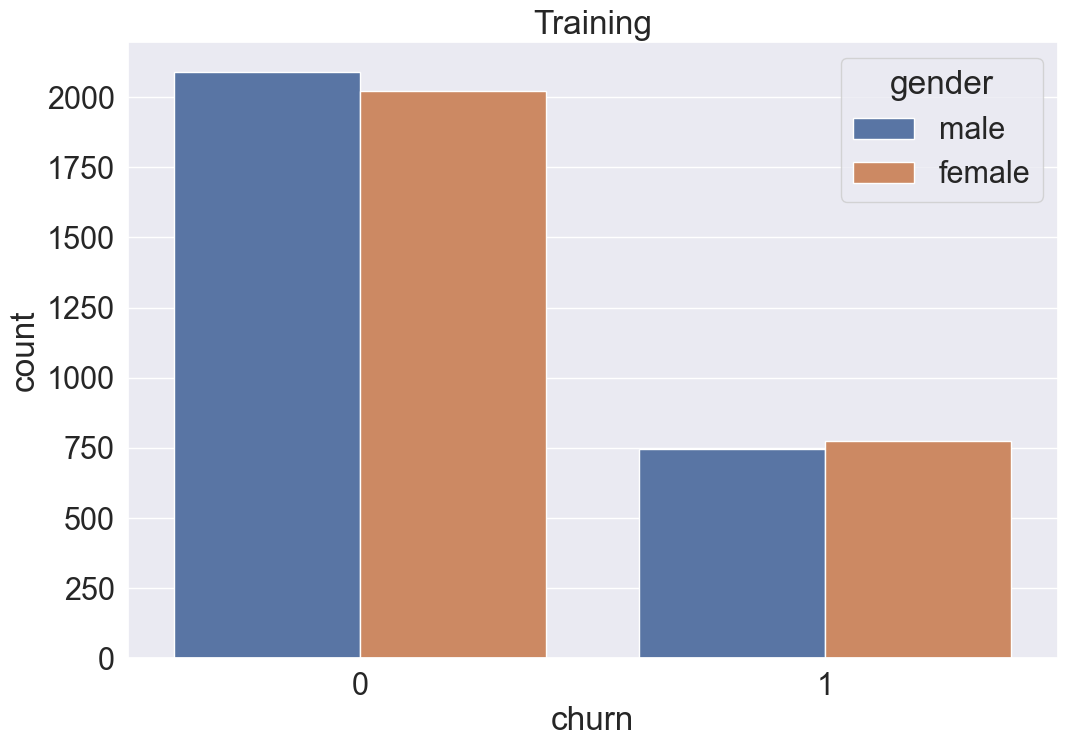

In [41]:
# Plot gender distirbutions throughout the two churn classes
sns.set(font_scale=2)
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
ax = sns.countplot(x=df_train_full["churn"], hue=df_train_full["gender"])
ax.set_title("Training")
# plt.savefig("Gender VS Churn")
plt.show()

One-hot Encoding

In [42]:
from sklearn.feature_extraction import DictVectorizer

In [43]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [44]:
train_dict[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

In [45]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [46]:
X_train = dv.transform(train_dict)

In [47]:
X_train.shape

(3774, 45)

In [48]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

Modelling: Training

I have built 3 prototype models using Grid Search and 5 fold cross validation for hyperparameter tuning.

1) Logistic Regression
2) Decision Tree
3) Random Forest
4) Gradient Boosted Classifier

In [51]:
# Define a machine learning pipline with k-fold crossvalidation and gridsearch
import time
from sklearn.model_selection import GridSearchCV


def model_pipeline(model, param_grid, x_train, Y_train):

    """
    Pipeline to train sklearn model using k-fold
    cross validation and grid search

    returns the best model and results for all
    traning runs

    parameters -
    model: an sklearn machine learning model
    param_gird: search space for grid search as dict

    """

    # Initialisa model with GridSearchCV or just GridSearch

    Tuned_Model = GridSearchCV(
        estimator=model, param_grid=param_grid, scoring="roc_auc", cv=5
    )

    # Fit model & Time the process for training the model
    print("Training Model")
    start_time = time.process_time()

    Tuned_Model.fit(x_train, Y_train)

    print("Finished training model")

    # End of fit time
    print(time.process_time() - start_time, "Seconds")

    return Tuned_Model, pd.DataFrame(Tuned_Model.cv_results_)

In [52]:
# Model 1: Logistic Regression

# Train and test a logistic regression model
from sklearn.linear_model import LogisticRegression

# Initialise the random forest model
model = LogisticRegression(penalty="l2", solver="liblinear", class_weight="balanced", random_state=1)
# Set paramters for Grid Search
param_grid = {"C": [0.001, 0.01, 0.1, 1], "fit_intercept": [True, False]}

# Train model and get results
Tuned_LogReg, Results_LogReg = model_pipeline(model, param_grid, X_train, y_train)

Results_LogReg

Training Model
Finished training model
0.15625 Seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011109,0.003811,0.003198,0.003917,0.001,True,"{'C': 0.001, 'fit_intercept': True}",0.815746,0.849100,0.827921,0.819497,0.817785,0.826010,0.012265,8
1,0.010208,0.003089,0.002703,0.003401,0.001,False,"{'C': 0.001, 'fit_intercept': False}",0.815887,0.849091,0.827947,0.819489,0.817706,0.826024,0.012251,7
2,0.014446,0.003225,0.001675,0.003349,0.01,True,"{'C': 0.01, 'fit_intercept': True}",0.831605,0.856884,0.847941,0.840840,0.834707,0.842395,0.009150,5
3,0.014116,0.006325,0.003201,0.003920,0.01,False,"{'C': 0.01, 'fit_intercept': False}",0.831605,0.856893,0.847994,0.840813,0.834583,0.842378,0.009181,6
4,0.017194,0.003687,0.002344,0.003231,0.1,True,"{'C': 0.1, 'fit_intercept': True}",0.831747,0.855465,0.851150,0.847037,0.836341,0.844348,0.008944,1
5,0.018429,0.003262,0.003903,0.003677,0.1,False,"{'C': 0.1, 'fit_intercept': False}",0.831773,0.855456,0.851105,0.847019,0.836208,0.844312,0.008951,2
6,0.017433,0.004961,0.001820,0.003120,1,True,"{'C': 1, 'fit_intercept': True}",0.831535,0.854874,0.851555,0.847196,0.836137,0.844259,0.008971,3
7,0.015396,0.003226,0.002460,0.002846,1,False,"{'C': 1, 'fit_intercept': False}",0.831509,0.854733,0.851599,0.847240,0.836049,0.844226,0.008972,4


In [53]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [54]:
model = Tuned_LogReg

In [55]:
model.predict_proba(X_val)

array([[0.54637744, 0.45362256],
       [0.49385026, 0.50614974],
       [0.44481904, 0.55518096],
       ...,
       [0.85740081, 0.14259919],
       [0.19919673, 0.80080327],
       [0.84628487, 0.15371513]])

In [56]:
y_pred = model.predict_proba(X_val)[:, 1]

In [57]:
y_pred

array([0.45362256, 0.50614974, 0.55518096, ..., 0.14259919, 0.80080327,
       0.15371513])

In [58]:
churn = y_pred > 0.5

In [60]:
# Simple Accuracy Calculation
(y_val == churn).mean()

0.7365591397849462

In [61]:
# Model 2: Decision Tree

# Train a decision tree
from sklearn.tree import DecisionTreeClassifier

# Initialise the random forest model
model = DecisionTreeClassifier(criterion="gini", class_weight="balanced")
# Set paramters for Grid Search
param_grid = {
    "max_depth": [5, 10, 30],
    "max_features": [0.1, 0.3, 0.7],
    "ccp_alpha": [0, 0.005, 0.01, 0.1],
}

# Train model and get results
Tuned_DecTree, Results_DecTree = model_pipeline(model, param_grid, X_train, y_train)

Results_DecTree

Training Model
Finished training model
1.1875 Seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004720,0.003859,0.000000,0.000000,0,5,0.1,"{'ccp_alpha': 0, 'max_depth': 5, 'max_features...",0.789974,0.793372,0.805582,0.789899,0.794222,0.794610,0.005758,7
1,0.004802,0.003921,0.003362,0.004125,0,5,0.3,"{'ccp_alpha': 0, 'max_depth': 5, 'max_features...",0.785584,0.834788,0.818942,0.833474,0.812650,0.817088,0.017874,2
2,0.011384,0.001746,0.001065,0.001119,0,5,0.7,"{'ccp_alpha': 0, 'max_depth': 5, 'max_features...",0.798005,0.830257,0.814349,0.835669,0.827858,0.821228,0.013569,1
3,0.005392,0.003411,0.000898,0.001314,0,10,0.1,"{'ccp_alpha': 0, 'max_depth': 10, 'max_feature...",0.734577,0.741960,0.784275,0.721107,0.697904,0.735965,0.028429,22
4,0.011210,0.004184,0.003142,0.003850,0,10,0.3,"{'ccp_alpha': 0, 'max_depth': 10, 'max_feature...",0.760230,0.758635,0.757044,0.740885,0.793344,0.762027,0.017131,18
5,0.024193,0.009022,0.000000,0.000000,0,10,0.7,"{'ccp_alpha': 0, 'max_depth': 10, 'max_feature...",0.708426,0.746800,0.762108,0.748797,0.737483,0.740723,0.017961,20
6,0.009601,0.005990,0.004802,0.003920,0,30,0.1,"{'ccp_alpha': 0, 'max_depth': 30, 'max_feature...",0.654814,0.640709,0.679837,0.665120,0.671811,0.662458,0.013624,30
7,0.017716,0.005879,0.000000,0.000000,0,30,0.3,"{'ccp_alpha': 0, 'max_depth': 30, 'max_feature...",0.695216,0.644562,0.710207,0.649833,0.667828,0.673529,0.025490,28
8,0.034938,0.004983,0.000456,0.000911,0,30,0.7,"{'ccp_alpha': 0, 'max_depth': 30, 'max_feature...",0.658089,0.698310,0.684527,0.654598,0.668702,0.672845,0.016449,29
9,0.004370,0.004255,0.004852,0.003165,0.005,5,0.1,"{'ccp_alpha': 0.005, 'max_depth': 5, 'max_feat...",0.751137,0.770179,0.791195,0.777139,0.754670,0.768864,0.014728,17


In [63]:
# Evaluate model accuracy separately on the validation dataset
model = Tuned_DecTree

In [64]:
model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 0])

In [66]:
y_pred = model.predict(X_val)

In [71]:
churn = y_pred == 1

In [72]:
# Simple Accuracy Calculation
(y_val == churn).mean()

0.7236559139784946

In [73]:
# Model 3: Random Forest

# Train a random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Initialise the random forest model
model = RandomForestClassifier(class_weight="balanced_subsample", bootstrap=True)

# Set paramters for Grid Search
param_grid = {
    "n_estimators": [200, 300, 400, 500, 600],
    "max_features": [0.1, 0.3, 0.6],
}

# Train model and get results
Tuned_RandomForest, Results_RandForest = model_pipeline(
    model, param_grid, X_train, y_train
)

Results_RandForest

Training Model
Finished training model
232.140625 Seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.067870,0.026066,0.029157,0.004023,0.1,200,"{'max_features': 0.1, 'n_estimators': 200}",0.825664,0.835850,0.846975,0.832787,0.826087,0.833473,0.007797,15
1,1.568904,0.032340,0.043513,0.003107,0.1,300,"{'max_features': 0.1, 'n_estimators': 300}",0.825567,0.838380,0.846491,0.832716,0.828736,0.834378,0.007416,11
2,2.118093,0.116587,0.057607,0.007556,0.1,400,"{'max_features': 0.1, 'n_estimators': 400}",0.826497,0.838045,0.848562,0.830834,0.827067,0.834201,0.008278,13
3,2.594831,0.014214,0.068052,0.003358,0.1,500,"{'max_features': 0.1, 'n_estimators': 500}",0.826122,0.836564,0.847244,0.833937,0.827270,0.834228,0.007604,12
4,3.208996,0.058590,0.084645,0.004970,0.1,600,"{'max_features': 0.1, 'n_estimators': 600}",0.828123,0.838103,0.845230,0.833302,0.827557,0.834463,0.006609,10
5,1.726742,0.065404,0.031553,0.004191,0.3,200,"{'max_features': 0.3, 'n_estimators': 200}",0.824941,0.840571,0.851150,0.837459,0.832812,0.837387,0.008665,2
6,3.535818,0.648208,0.054863,0.017137,0.3,300,"{'max_features': 0.3, 'n_estimators': 300}",0.827255,0.841598,0.850854,0.835101,0.830220,0.837006,0.008457,3
7,5.751935,0.075282,0.103725,0.015066,0.3,400,"{'max_features': 0.3, 'n_estimators': 400}",0.826523,0.838266,0.848113,0.837530,0.833541,0.836794,0.007027,4
8,7.051430,0.144892,0.119570,0.020952,0.3,500,"{'max_features': 0.3, 'n_estimators': 500}",0.825042,0.841677,0.849779,0.833858,0.831554,0.836382,0.008553,5
9,4.893285,0.715820,0.070597,0.001463,0.3,600,"{'max_features': 0.3, 'n_estimators': 600}",0.825584,0.841263,0.851696,0.836088,0.833276,0.837582,0.008689,1


In [75]:
model = Tuned_RandomForest
model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 0])

In [76]:
y_pred = model.predict(X_val)

In [77]:
churn = y_pred == 1

In [78]:
(y_val == churn).mean()

0.7833333333333333

In [80]:
# Model 4: Gradient Boosting Machines Classifier

# Train a GBM classifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialise the random forest model
model = GradientBoostingClassifier()

# Set paramters for Grid Search
param_grid = {
    "n_estimators": [300],
    "max_depth": [5, 10, 30],
    "learning_rate": [0.01, 0.05, 0.1],
}

# Train model and get results
Tuned_GBM, Results_GBM = model_pipeline(model, param_grid, X_train, y_train)

Results_GBM

Training Model
Finished training model
343.234375 Seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.490550,0.018865,0.007372,0.000498,0.01,5,300,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.829375,0.852207,0.859568,0.847315,0.848382,0.847370,0.009970,1
1,16.157900,2.471574,0.030583,0.011807,0.01,10,300,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.800588,0.834069,0.837080,0.814891,0.819264,0.821179,0.013313,6
2,12.030529,1.044134,0.019802,0.002741,0.01,30,300,"{'learning_rate': 0.01, 'max_depth': 30, 'n_es...",0.664569,0.684624,0.708673,0.624326,0.650990,0.666636,0.028740,9
3,3.782100,0.073647,0.006085,0.000121,0.05,5,300,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.823980,0.849025,0.858202,0.826792,0.832578,0.838115,0.013275,2
4,9.214142,0.194389,0.013658,0.001517,0.05,10,300,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",0.805917,0.844093,0.847544,0.821860,0.821865,0.828256,0.015515,3
5,16.086187,1.885773,0.030277,0.009706,0.05,30,300,"{'learning_rate': 0.05, 'max_depth': 30, 'n_es...",0.697481,0.702114,0.702907,0.640709,0.700695,0.688781,0.024107,8
6,5.518554,0.272623,0.008151,0.005174,0.1,5,300,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.808350,0.837186,0.855769,0.810488,0.824625,0.827284,0.017647,4
7,12.771455,2.216167,0.018045,0.006809,0.1,10,300,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.802435,0.841906,0.843938,0.816438,0.822298,0.825403,0.015706,5
8,9.122455,0.335704,0.014795,0.000748,0.1,30,300,"{'learning_rate': 0.1, 'max_depth': 30, 'n_est...",0.773414,0.821009,0.809192,0.795510,0.786746,0.797174,0.016665,7


In [ ]:
model = Tuned_RandomForest
model.predict(X_val)

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
churn = y_pred == 1

In [ ]:
(y_val == churn).mean()